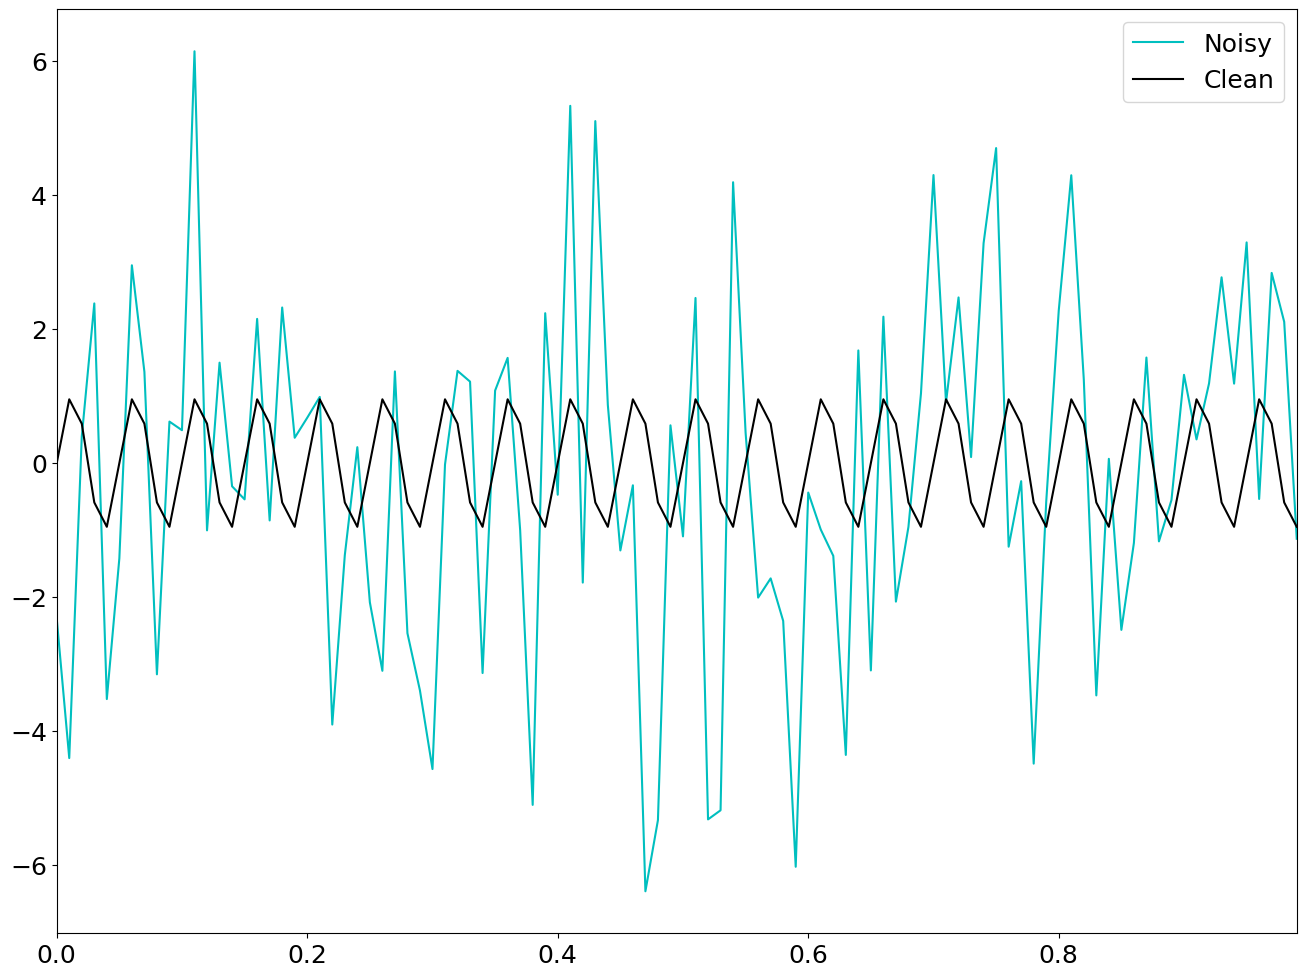

In [30]:
import numpy as np
import matplotlib.pyplot as plt 

#plt.rcParams['figure.figsize'] = [16, 12]
#plt.rcParams.update({'font.size': 18})

dt = 0.01
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

plt.plot(t, f, color='c', label='Noisy')
plt.plot(t, f_clean, color='k', label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

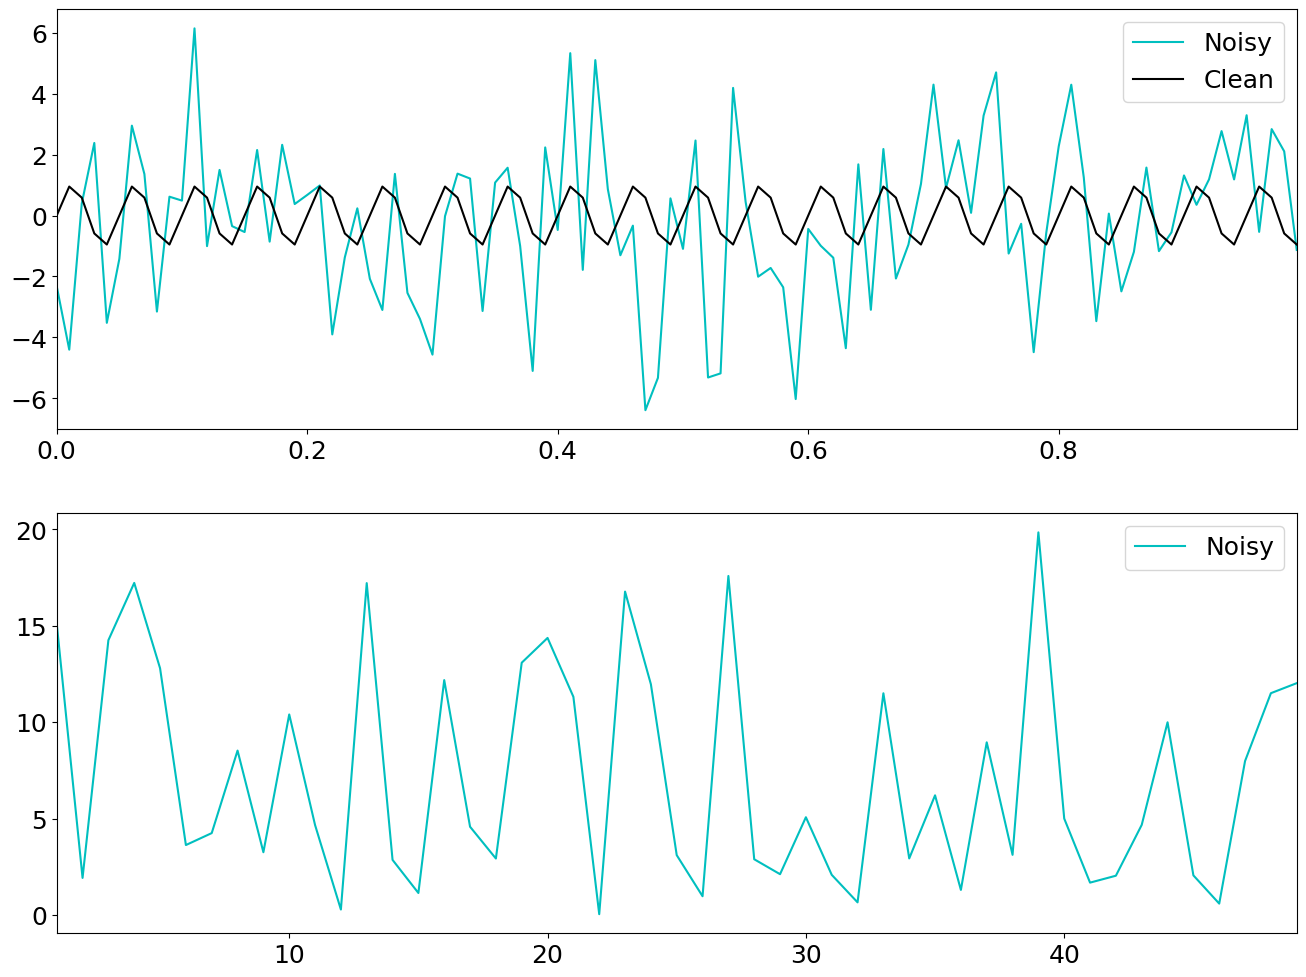

In [31]:
#Compute Fast Fourier Transform. 

n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, f, color='c', label='Noisy')
plt.plot(t, f_clean, color='k', label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

In [32]:
# Use the PSD to filter out noise. 

indices = PSD > 10
PSDclean = PSD * indices
fhat = indices * fhat

ffilt = np.fft.ifft(fhat)

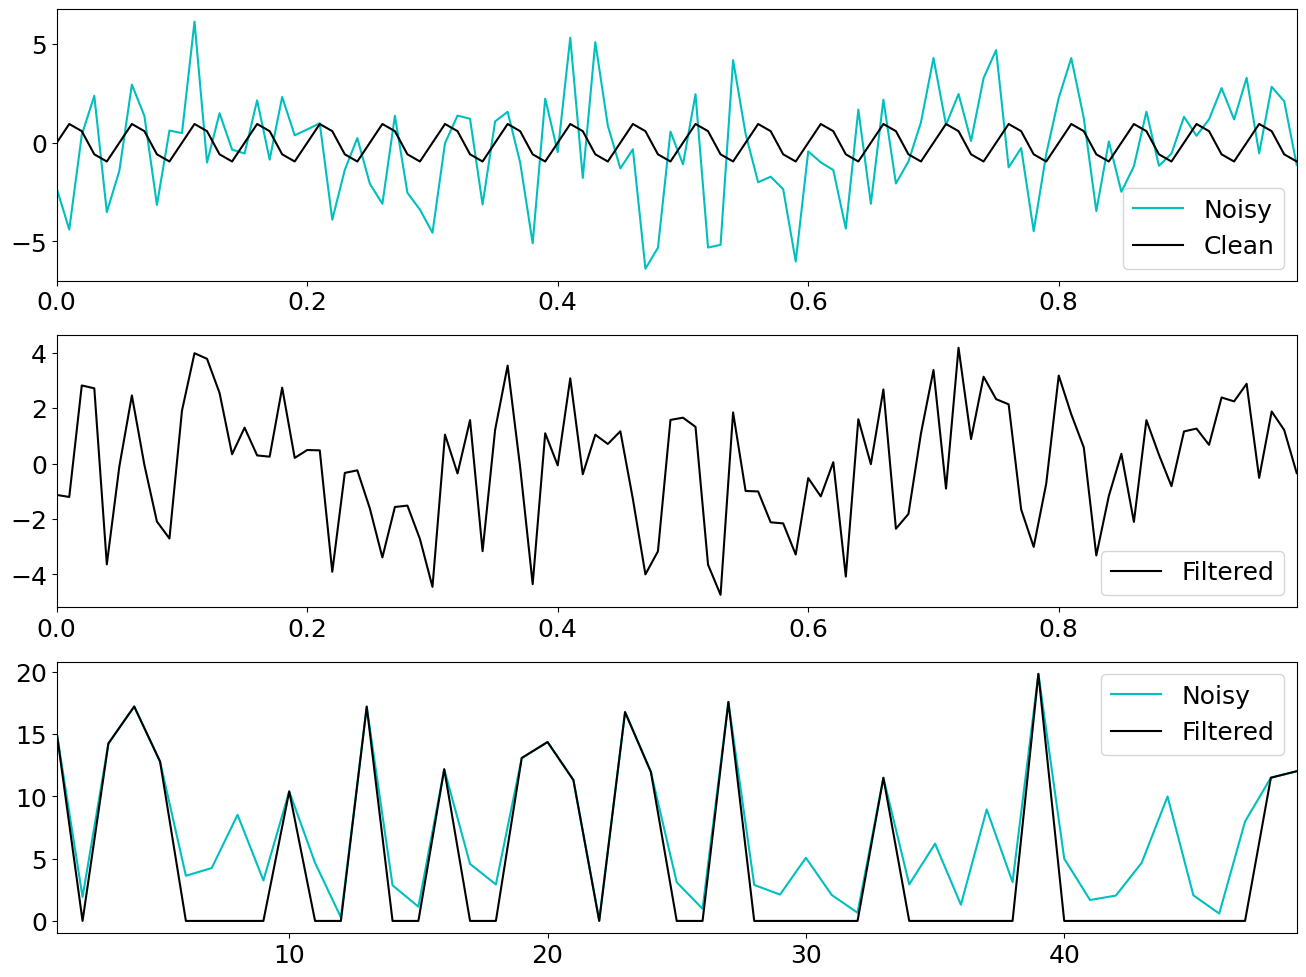

In [33]:
#Plots 

fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t, f, color='c', label='Noisy')
plt.plot(t, f_clean, color='k', label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])

plt.plot(t, ffilt, color='k', label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()


plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='c', label='Noisy')
plt.plot(freq[L], PSDclean[L], color='k', label='Filtered')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

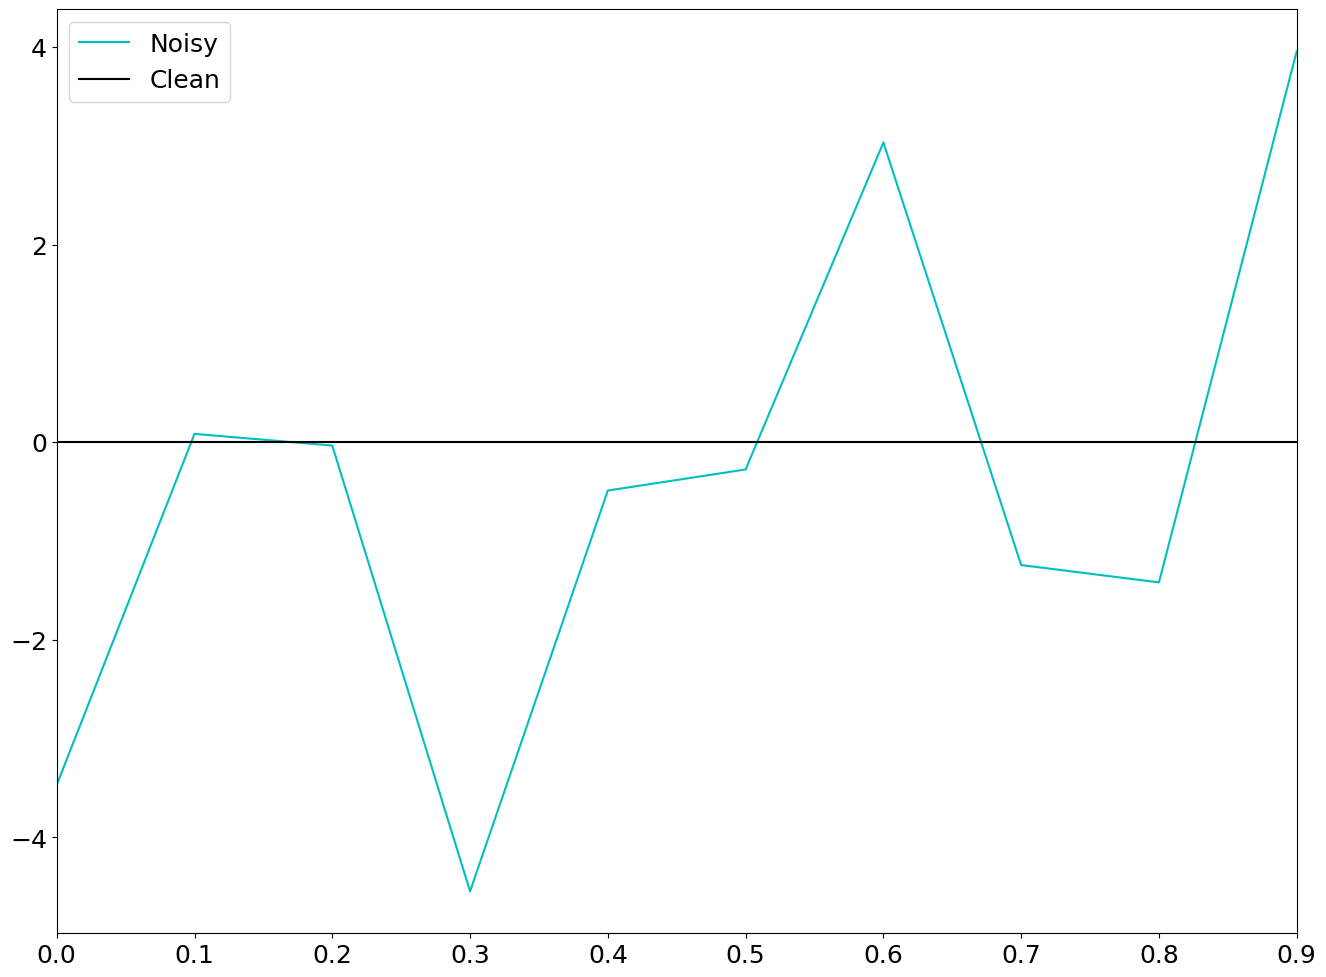

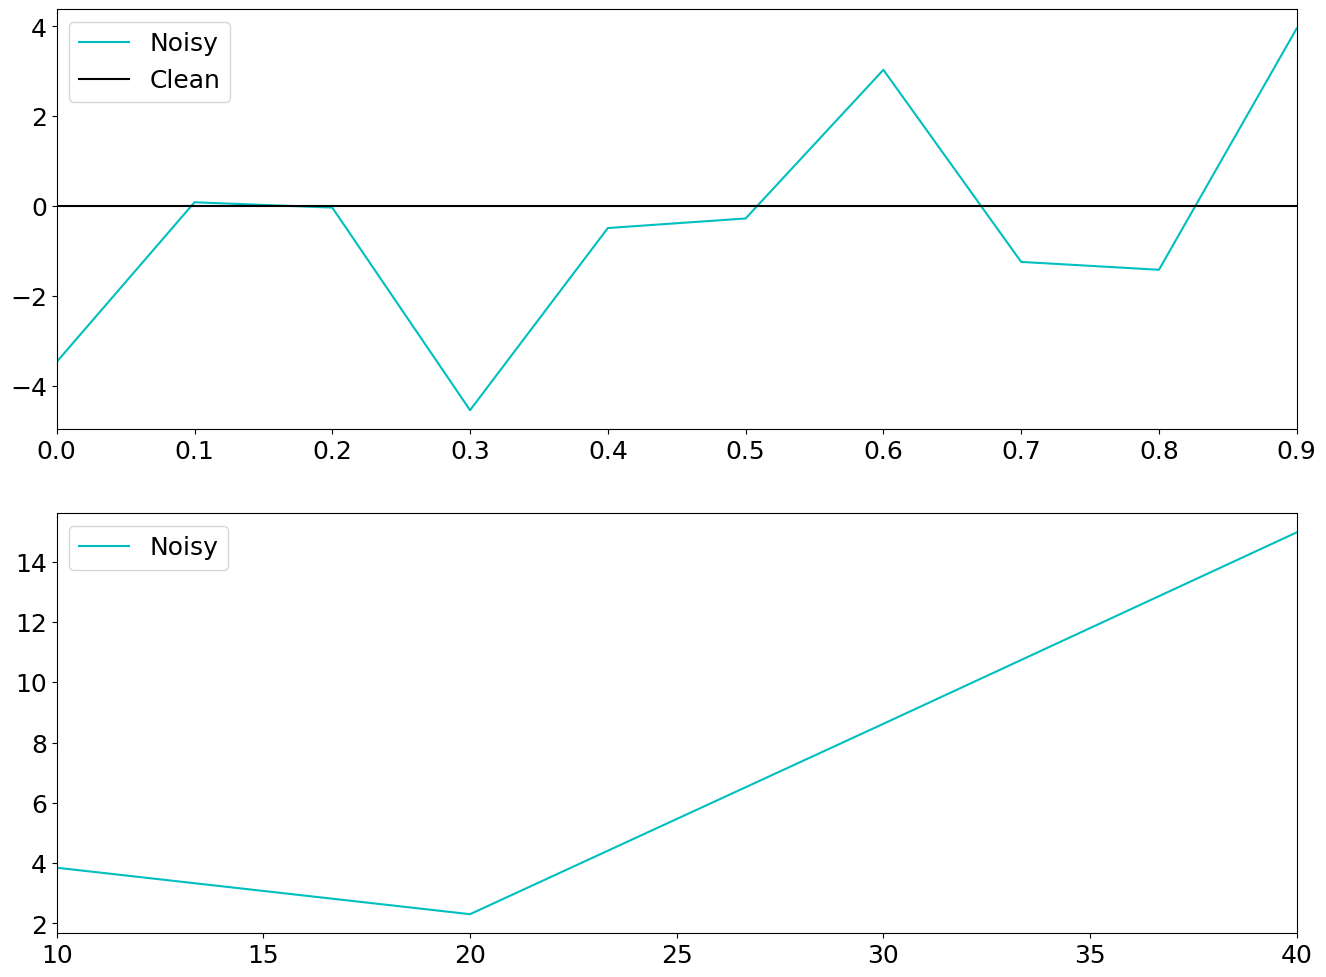

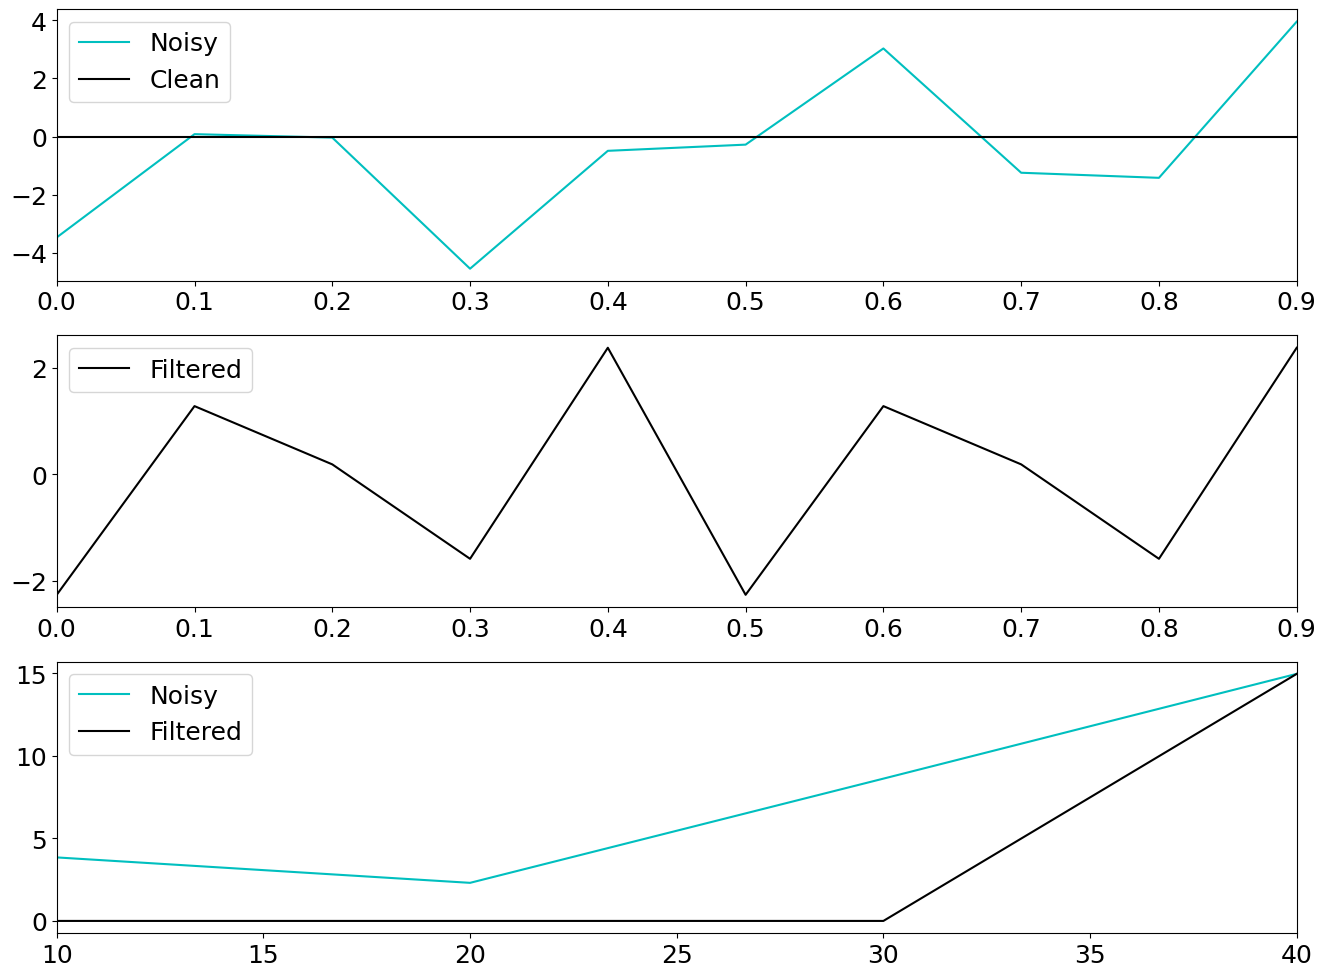

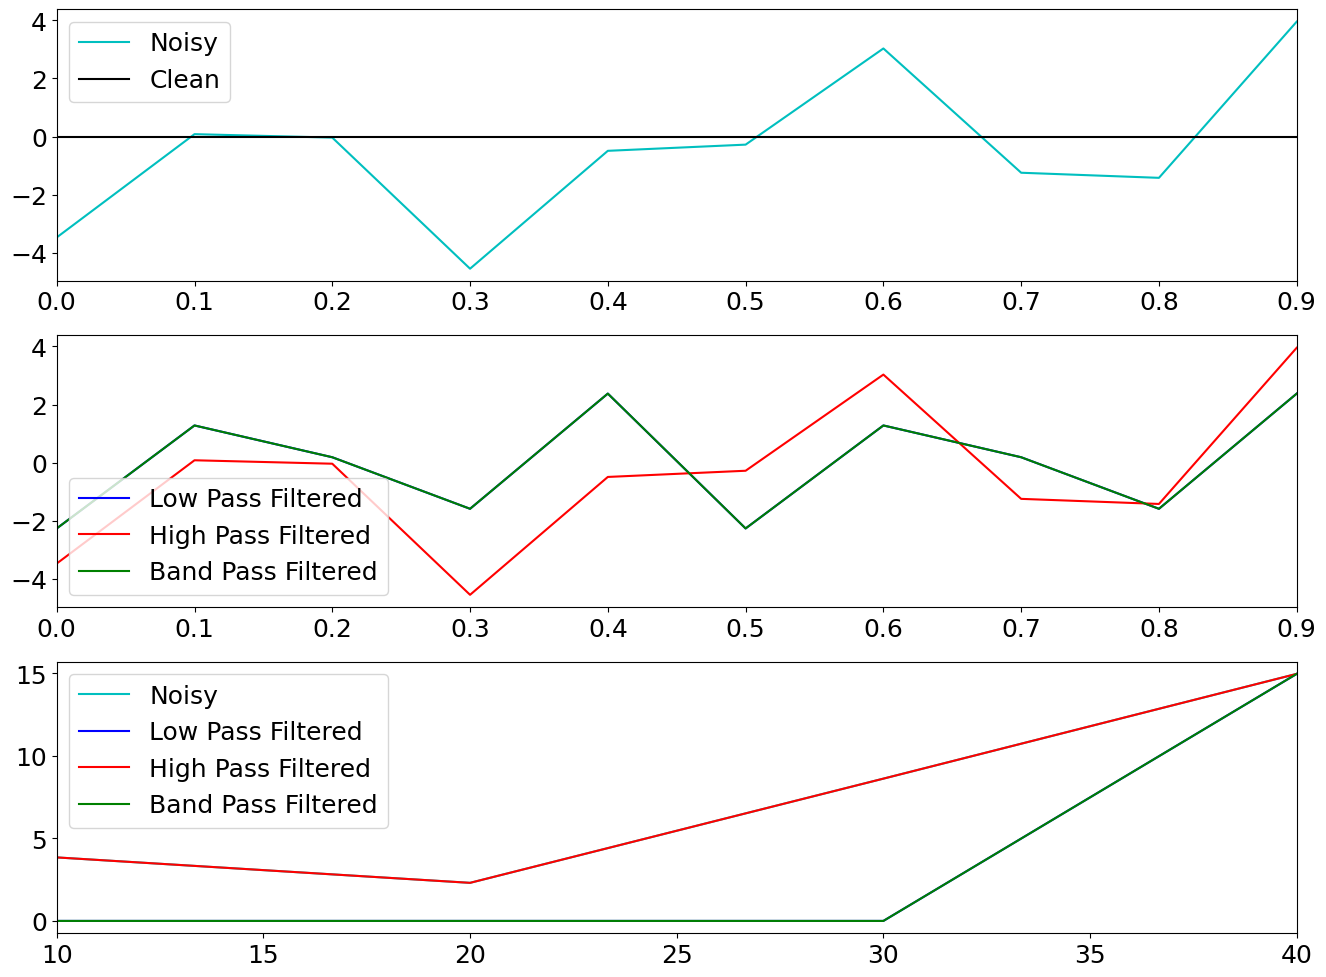

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal():
    dt = 0.1
    t = np.arange(0, 1, dt)
    f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
    f_clean = f
    f = f + 2.5*np.random.randn(len(t))
    return t, f, f_clean

def plot_signal(t, f, f_clean):
    plt.plot(t, f, color='c', label='Noisy')
    plt.plot(t, f_clean, color='k', label='Clean')
    plt.xlim(t[0], t[-1])
    plt.legend()

def compute_fft(f, dt):
    n = len(f)
    fhat = np.fft.fft(f, n)
    PSD = fhat * np.conj(fhat) / n
    freq = (1/(dt*n)) * np.arange(n)
    L = np.arange(1, np.floor(n/2), dtype='int')
    return fhat, PSD, freq, L

def filter_noise(PSD, fhat):
    indices = PSD > 10
    PSDclean = PSD * indices
    fhat_filtered = indices * fhat
    return PSDclean, fhat_filtered

def inverse_fft(fhat_filtered):
    return np.fft.ifft(fhat_filtered)

def low_pass_filter(PSD, fhat, threshold):
    indices = PSD > threshold
    PSD_clean = PSD * indices
    fhat_filtered = indices * fhat
    return PSD_clean, fhat_filtered

def high_pass_filter(PSD, fhat, threshold):
    indices = PSD <= threshold
    PSD_clean = PSD * indices
    fhat_filtered = indices * fhat
    return PSD_clean, fhat_filtered

def band_pass_filter(PSD, fhat, low_threshold, high_threshold):
    indices = (PSD >= low_threshold) & (PSD <= high_threshold)
    PSD_clean = PSD * indices
    fhat_filtered = indices * fhat
    return PSD_clean, fhat_filtered

def main():
    t, f, f_clean = generate_signal()
    plot_signal(t, f, f_clean)

    fhat, PSD, freq, L = compute_fft(f, 0.01)

    fig, axs = plt.subplots(2, 1)
    plt.sca(axs[0])
    plot_signal(t, f, f_clean)

    plt.sca(axs[1])
    plt.plot(freq[L], PSD[L], color='c', label='Noisy')
    plt.xlim(freq[L[0]], freq[L[-1]])
    plt.legend()

    PSDclean, fhat_filtered = filter_noise(PSD, fhat)

    ffilt = inverse_fft(fhat_filtered)

    fig, axs = plt.subplots(3, 1)
    plt.sca(axs[0])
    plot_signal(t, f, f_clean)

    plt.sca(axs[1])
    plt.plot(t, ffilt, color='k', label='Filtered')
    plt.xlim(t[0], t[-1])
    plt.legend()

    plt.sca(axs[2])
    plt.plot(freq[L], PSD[L], color='c', label='Noisy')
    plt.plot(freq[L], PSDclean[L], color='k', label='Filtered')
    plt.xlim(freq[L[0]], freq[L[-1]])
    plt.legend()


    low_threshold = 10  # Define your low-pass threshold
    high_threshold = 1000  # Define your high-pass threshold

    PSD_low_pass, fhat_low_pass = low_pass_filter(PSD, fhat, low_threshold)
    PSD_high_pass, fhat_high_pass = high_pass_filter(PSD, fhat, high_threshold)
    PSD_band_pass, fhat_band_pass = band_pass_filter(PSD, fhat, low_threshold, high_threshold)

    # Apply inverse FFT to filtered signals
    ffilt_low_pass = inverse_fft(fhat_low_pass)
    ffilt_high_pass = inverse_fft(fhat_high_pass)
    ffilt_band_pass = inverse_fft(fhat_band_pass)

    # Plotting the results
    fig, axs = plt.subplots(3, 1)

    plt.sca(axs[0])
    plot_signal(t, f, f_clean)

    plt.sca(axs[1])
    plt.plot(t, ffilt_low_pass, color='b', label='Low Pass Filtered')
    plt.plot(t, ffilt_high_pass, color='r', label='High Pass Filtered')
    plt.plot(t, ffilt_band_pass, color='g', label='Band Pass Filtered')
    plt.xlim(t[0], t[-1])
    plt.legend()

    plt.sca(axs[2])
    plt.plot(freq[L], PSD[L], color='c', label='Noisy')
    plt.plot(freq[L], PSD_low_pass[L], color='b', label='Low Pass Filtered')
    plt.plot(freq[L], PSD_high_pass[L], color='r', label='High Pass Filtered')
    plt.plot(freq[L], PSD_band_pass[L], color='g', label='Band Pass Filtered')
    plt.xlim(freq[L[0]], freq[L[-1]])
    plt.legend()
    
if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, freqz
import scipy.fft




class FFTProcessor:
    """
    Clase que engloba funciones para el procesamiento de señales en el dominio de la frecuencia.

    NOTA: Se recomienda realizar un muestreo de la señal para obtener la cantidad de muestras por segundo.

    Atributos:
        - frecuencia_muestreo (int): Tasa de muestreo o cantidad de muestras tomadas por unidad de tiempo.
        - fft_result (np.ndarray): Resultado de la transformada de Fourier.
        - frecuencias (np.ndarray): Frecuencias asociadas a la FFT.
        - magnitud (np.ndarray): Magnitud de la FFT.

    Métodos:
        - __init__(self, frecuencia_muestreo=10):
            Inicializa la clase `FFTProcessor`.

        - signal_fft(self, x_tiempo, y_señal):
            Calcula la transformada de Fourier de una señal en el dominio del tiempo.

        - dataframe_fft(self, dataframe):
            Calcula la transformada de Fourier de un dataframe de señales.

        - grafica_variable(self, x_tiempo, y_señal, fft, frecuencias, magnitud, frecuencia_muestreo):
            Genera una gráfica con la señal original, la FFT y el espectro de magnitud de frecuencias.

        - grafica_fft(self, frecuencias, fft_calculada, title: str, axs=None):
            Grafica la transformada de Fourier.

        - low_pass_filter(self, fft_calculated: np.ndarray, cutoff_freq: float, filter_type='FIR') -> np.ndarray:
            Aplica un filtro pasabajos a la FFT para retener componentes de frecuencias por debajo de la frecuencia de corte.

        - high_pass_filter(self, fft_calculated: np.ndarray, cutoff_freq: float) -> np.ndarray:
            Aplica un filtro pasa altos a la FFT para retener componentes de frecuencias por encima de la frecuencia de corte.

        - inverse_transform(self, fft_calculated: np.ndarray) -> np.ndarray:
            Realiza una transformada inversa de la FFT para obtener la señal en el dominio del tiempo.

        """
    def __init__(self, frecuencia_muestreo=100):
        """
        Inicializa la clase FFTProcessor con la frecuencia de muestreo dada.
        """
        # Crea los atributos para la clase
        self.frecuencia_muestreo = frecuencia_muestreo
        self.fft_result = None
        self.frequencias = None
        self.magnitud = None

    def signal_fft(self, x_tiempo, y_señal):
        """
        Calcula la Transformada de Fourier de una señal en el dominio del tiempo.
        Devuelve la FFT, frecuencias y magnitud de la señal.
        """
        # Calcula la FFT de la señal y las frecuencias asociadas
        self.fft_result = scipy.fft.fft(y_señal)
        self.frequencias = scipy.fftpack.fftfreq(len(y_señal), 1 / self.frecuencia_muestreo)
        self.magnitud = np.abs(self.fft_result)
        # Grafica la señal original y su FFT
        self.grafica_variable(x_tiempo=x_tiempo, y_señal=y_señal, fft=self.fft_result,
                            frecuencias=self.frequencias, magnitud=self.magnitud,
                            frecuencia_muestreo=self.frecuencia_muestreo)
        return self.fft_result, self.frequencias, self.magnitud

    def dataframe_fft(self, dataframe):
        """
        Calcula la Transformada de Fourier de un dataframe de señales.
        Grafica la magnitud de la FFT para cada variable del dataframe.
        """
        # Crea un diccionario para almacenar los resultados de la FFT
        self.fft_results = {}
        for col in dataframe.columns:
            y = dataframe[col].values
            # Calcula la FFT para cada columna del dataframe
            fft_result = scipy.fft.fft(np.abs(y))
            frecuencias = scipy.fft.fftfreq(len(y), 1 / self.frecuencia_muestreo)
            magnitud = np.abs(fft_result)
            # Almacena los resultados en el diccionario
            self.fft_results[col] = {'señal_original': y, 'fft_result': fft_result,
                                    'frecuencias': frecuencias, 'magnitud': magnitud}
        # Grafica la magnitud de la FFT para cada variable del dataframe
        for col, data in self.fft_results.items():
            time = np.linspace(0, (len(data['magnitud']) - 1) * 0.1, len(data['magnitud']))
            self.grafica_variable(x_tiempo=time, y_señal=data['señal_original'],
                                fft=data['fft_result'], frecuencias=data['frecuencias'],
                                magnitud=data['magnitud'], frecuencia_muestreo=self.frecuencia_muestreo)

    def grafica_variable(self, x_tiempo, y_señal, fft, frecuencias, magnitud, frecuencia_muestreo):
        """
        Grafica la señal original, su FFT y el espectro de magnitud de frecuencias.
        """
        # Crea una gráfica con subplots para la señal original, la FFT y el espectro de magnitud
        self.fig, self.axs = plt.subplots(3, 1)

        # Grafica la señal original en el primer subplot
        self.axs[0].plot(x_tiempo, y_señal)
        self.axs[0].set_title('Señal original')
        self.axs[0].set_xlabel('Tiempo')
        self.axs[0].set_ylabel('Amplitud')
        self.axs[0].grid(True)

        # Grafica la FFT en el segundo subplot
        self.axs[1].plot(frecuencias[:len(frecuencias)//2], np.abs(fft)[:len(frecuencias)//2])
        self.axs[1].set_title('Transformada de Fourier (FFT)')
        self.axs[1].set_xlabel('Frecuencia (Hz)')
        self.axs[1].set_ylabel('Amplitud')
        self.axs[1].grid(True)

        # Grafica el espectro de magnitud de frecuencias en el tercer subplot
        self.axs[2].bar(frecuencias[:len(frecuencias)//2], magnitud[:len(frecuencias)//2])
        self.axs[2].set_title('Espectro de magnitud de frecuencias')
        self.axs[2].set_xlabel('Frecuencia (Hz)')
        self.axs[2].set_ylabel('Magnitud')
        self.axs[2].grid(True)

        # Ajusta la disposición y muestra la gráfica
        plt.tight_layout()
        plt.show()


    def grafica_fft(self, frecuencias, fft_calculada, title: str, axs=None):
        """
        Grafica la Transformada de Fourier (FFT) de una señal.

        Args:
            frecuencias (array): Array de frecuencias.
            fft_calculada (array): FFT calculada de la señal.
            title (str): Título para la gráfica.
            axs (matplotlib.axes.Axes, optional): Eje sobre el cual se graficará. Predeterminado: None.
        """
        # Grafica la FFT de la señal en el eje dado
        axs.plot(frecuencias[:len(frecuencias)//2], np.abs(fft_calculada)[:len(frecuencias)//2])
        axs.set_title(f'Transformada de Fourier (FFT) {title}')
        axs.set_xlabel('Frecuencia (Hz)')
        axs.set_ylabel('Amplitud')
        axs.grid(True)
        plt.tight_layout()


    def low_pass_filter(self, fft_calculated: np.ndarray, cutoff_freq: float, filter_type='FIR') -> np.ndarray:
        """
        Aplica un filtro pasabajos a una FFT.

        Args:
            fft_calculated (np.ndarray): FFT de la señal.
            cutoff_freq (float): Frecuencia de corte del filtro.
            filter_type (str): Tipo de filtro a aplicar. Opciones: 'FIR', 'butterworth', etc.

        Returns:
            np.ndarray: Señal filtrada después de aplicar el filtro pasabajos.
        """
        if filter_type == 'FIR':
            # Implementa un filtro FIR
            num_taps = 101  # Ajustar según sea necesario
            fir_coeff = scipy.signal.firwin(num_taps, cutoff_freq, fs=self.frecuencia_muestreo)
            filtered_signal = scipy.signal.lfilter(fir_coeff, 1.0, fft_calculated)
        elif filter_type == 'butterworth':
            # Implementa un filtro Butterworth
            order = 4  # Orden del filtro (modificar según sea necesario)
            b, a = scipy.signal.butter(order, cutoff_freq, fs=self.frecuencia_muestreo)
            filtered_signal = scipy.signal.lfilter(b, a, fft_calculated)
        else:
            raise ValueError("Tipo de filtro inválido. Elija entre 'FIR', 'butterworth', etc.")

        return filtered_signal


    def high_pass_filter(self, fft_calculated: np.ndarray, cutoff_freq: float) -> np.ndarray:
        """
        Aplica un filtro pasa altos a una FFT.

        Args:
            fft_calculated (np.ndarray): FFT de la señal.
            cutoff_freq (float): Frecuencia de corte del filtro.

        Returns:
            np.ndarray: Señal filtrada después de aplicar el filtro pasa altos.
        """
        if cutoff_freq > 0:
            filtered_signal = fft_calculated * (np.abs(self.frequencias) > cutoff_freq)
        else:
            filtered_signal = fft_calculated

        return filtered_signal



    def inverse_transform(self, fft_calculated: np.ndarray) -> np.ndarray:
        """
        Realiza una transformación inversa sobre una FFT para obtener la señal en el dominio del tiempo.

        Args:
            fft_calculated (np.ndarray): FFT de la señal.

        Returns:
            np.ndarray: Señal en el dominio del tiempo después de realizar la transformación inversa.
        """
        if self.fft_result is None:
            raise ValueError("No hay resultado de FFT disponible para realizar la transformación inversa.")

        inverse_signal = scipy.fft.ifft(fft_calculated)
        return inverse_signal.real  # Toma la parte real ya que la inversa puede tener una parte imaginaria despreciable


